In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import train_test_split
%matplotlib inline

/mnt/disks/user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
link="https://raw.githubusercontent.com/cerndb/dist-keras/master/examples/data/mnist.csv"

In [6]:
mydata=pd.read_csv(link)

In [7]:
mydata.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
mydata.tail(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


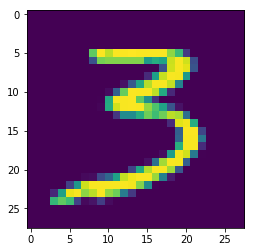

In [9]:
a = mydata.iloc[25,1:].values
a=a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [10]:
# seperating labels and data values
x_data=mydata.iloc[:,1:]

# label
y_data=mydata.iloc[:,0]

In [11]:
# creating test and train size/batches
x_train,x_test,y_train,y_test= train_test_split(x_data,y_data,test_size=0.2,random_state=4)

In [28]:
y_train.head()

32576    5
34735    0
3476     3
27750    0
16211    3
Name: label, dtype: int64

In [13]:
y_test.head()

26068    0
11015    4
19342    0
13440    3
29732    7
Name: label, dtype: int64

In [14]:
# call classifier 
rf=RandomForestClassifier(n_estimators=100)

In [17]:
# fit the model
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
pred = rf.predict(x_test)
pred

array([0, 4, 0, ..., 0, 3, 1])

In [25]:
h = y_test.values
count = 0

for i in range(len(pred)):
    if pred[i]==h[i]:
        count = count+1
len(pred)

8400

In [26]:
count

8081

In [29]:
#accuracy 
count/len(pred)

0.9620238095238095